In [1]:
import io
import pandas as pd
import numpy as np

In [2]:
from pandas_profiling import ProfileReport

In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import plotly.express as px
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_curve,
)

%matplotlib inline
# import opendatasets as od
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RepeatedStratifiedKFold,
    StratifiedKFold,
    cross_val_predict,
    cross_val_score,
    train_test_split,
)
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

# games

In [4]:
games = pd.read_csv('games.csv')

In [5]:
games.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [6]:
game=games.drop(['gameId','creationTime','seasonId','t1_champ1id','t1_champ1_sum1','t1_champ1_sum2','t1_champ2id','t1_champ2_sum1','t1_champ2_sum2','t1_champ3id','t1_champ3_sum1','t1_champ3_sum2','t1_champ4id','t1_champ4_sum1','t1_champ4_sum2','t1_champ5id','t1_champ5_sum1','t1_champ5_sum2','t2_champ1id','t2_champ1_sum1','t2_champ1_sum2','t2_champ2id','t2_champ2_sum1','t2_champ2_sum2','t2_champ3id','t2_champ3_sum1','t2_champ3_sum2','t2_champ4id','t2_champ4_sum1','t2_champ4_sum2','t2_champ5id','t2_champ5_sum1','t2_champ5_sum2'],axis=1)

In [7]:
game

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1949,1,2,1,1,1,1,2,11,1,...,5,0,0,1,1,114,67,43,16,51
1,1851,1,1,1,1,0,1,1,10,4,...,2,0,0,0,0,11,67,238,51,420
2,1493,1,2,1,1,1,2,0,8,1,...,2,0,0,1,0,157,238,121,57,28
3,1758,1,1,1,1,1,1,0,9,2,...,0,0,0,0,0,164,18,141,40,51
4,2094,1,2,1,1,1,1,0,9,2,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,2,0,...,10,2,0,4,0,55,-1,90,238,157
51486,3304,2,1,1,2,2,2,2,5,4,...,11,7,4,4,1,157,55,119,154,105
51487,2156,2,2,2,2,0,1,0,0,0,...,10,2,0,2,0,113,122,53,11,157
51488,1475,2,2,2,2,0,2,0,0,0,...,11,3,0,1,0,154,39,51,90,114


In [8]:
profile = ProfileReport(games)

In [9]:
profile.to_file('report_mini.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:
profile = ProfileReport(games)

In [28]:
profile.to_file('report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# first 10 min

In [11]:
first_10=pd.read_csv('high_diamond_ranked_10min.csv')

In [12]:
first_10_profile = ProfileReport(first_10)

In [13]:
first_10_profile.to_file('first_10_min.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
first_10.describe()

In [16]:
data = first_10.drop(['gameId','blueCSPerMin','blueGoldPerMin','redCSPerMin','redGoldPerMin','redFirstBlood'],axis=1)
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000


# data preprocessing

In [17]:
kills_ratio = (data['blueKills']-data['redKills'])/(data['blueKills']+data['redKills'])
assist_ratio = (data['blueAssists']-data['redAssists'])/(data['blueAssists']+data['redAssists'])
#death_ratio  
wards_place_ratio = (data['blueWardsPlaced']-data['redWardsPlaced'])/(data['blueWardsPlaced']+data['redWardsPlaced'])
wards_destroy_ratio = (data['blueWardsDestroyed']-data['redWardsDestroyed'])/(data['blueWardsDestroyed']+data['redWardsDestroyed'])
gold_ratio = data['blueGoldDiff']/(data['blueTotalGold']+data['redTotalGold'])
experience_ratio = data['blueExperienceDiff']/(data['blueTotalExperience']+data['redTotalExperience'])
level_ratio = (data['blueAvgLevel']-data['redAvgLevel'])/(data['blueAvgLevel']+data['redAvgLevel'])
jungle_ratio = (data['blueTotalJungleMinionsKilled']-data['redTotalJungleMinionsKilled'])/(data['blueTotalJungleMinionsKilled']+data['redTotalJungleMinionsKilled'])
minions_ratio = (data['blueTotalMinionsKilled']-data['redTotalMinionsKilled'])/(data['blueTotalMinionsKilled']+data['redTotalMinionsKilled'])


In [18]:
data_pro = pd.DataFrame()

In [19]:
data_pro.insert(0, 'blueWins', data['blueWins'], allow_duplicates=False)
data_pro.insert(0, 'kills ratio', kills_ratio, allow_duplicates=False)
data_pro.insert(0, 'wards place ratio', wards_place_ratio, allow_duplicates=False)
data_pro.insert(0, 'wards destroy ratio ', wards_destroy_ratio , allow_duplicates=False)
data_pro.insert(0, 'gold ratio', gold_ratio, allow_duplicates=False)
data_pro.insert(0, 'experience ratio', experience_ratio, allow_duplicates=False)
data_pro.insert(0, 'level ratio', level_ratio, allow_duplicates=False)
data_pro.insert(0, 'jungle ratio', jungle_ratio, allow_duplicates=False)
data_pro.insert(0, 'minions ratio', minions_ratio, allow_duplicates=False)
data_pro.insert(0, 'blue first blood', data['blueFirstBlood'], allow_duplicates=False)
data_pro.insert(0, 'blue elite monsters', data['blueEliteMonsters'], allow_duplicates=False)
data_pro.insert(0, 'blue dragons', data['blueDragons'], allow_duplicates=False)
data_pro.insert(0, 'blue heralds', data['blueHeralds'], allow_duplicates=False)
data_pro.insert(0, 'red elite monsters', data['redEliteMonsters'], allow_duplicates=False)
data_pro.insert(0, 'red dragons', data['redDragons'], allow_duplicates=False)
data_pro.insert(0, 'red heralds', data['redHeralds'], allow_duplicates=False)

In [20]:
data_pro

,red heralds,red dragons,red elite monsters,blue heralds,blue dragons,blue elite monsters,blue first blood,minions ratio,jungle ratio,level ratio,experience ratio,gold ratio,wards destroy ratio,wards place ratio,kills ratio,blueWins
0,0,0,0,0,0,0,1,-0.005102,-0.208791,-0.014925,-0.000235,0.019037,-0.500000,0.302326,0.200000,0
1,1,1,2,0,0,0,0,-0.159420,-0.094737,-0.014925,-0.034804,-0.089942,0.000000,0.000000,0.000000,0
2,0,0,0,0,1,1,0,-0.043702,0.243243,-0.030303,-0.030859,-0.035092,-1.000000,0.000000,-0.222222,0
3,0,0,0,1,0,1,0,-0.077982,0.078431,0.000000,-0.000195,-0.041758,-0.333333,0.482759,-0.111111,0
4,0,1,1,0,0,0,0,-0.034483,-0.080645,0.000000,0.006241,-0.029701,0.333333,0.630435,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,0,0,0,0,1,1,1,-0.040909,0.339806,0.028571,0.069618,0.076308,-0.200000,-0.460317,0.272727,1
9875,0,0,0,0,1,1,0,0.061503,-0.076923,0.014085,0.023603,0.024673,-1.000000,0.636364,0.200000,1
9876,0,1,1,0,0,0,0,-0.108280,-0.142857,-0.027778,-0.049472,-0.070598,1.000000,0.243243,-0.076923,0
9877,0,0,0,0,1,1,1,-0.048832,0.090909,-0.043478,-0.030526,-0.028195,0.000000,-0.650000,-0.200000,0


In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [22]:
data_pro=data_pro.dropna(axis=0,how='any')

In [23]:
datapro = ProfileReport(data_pro)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

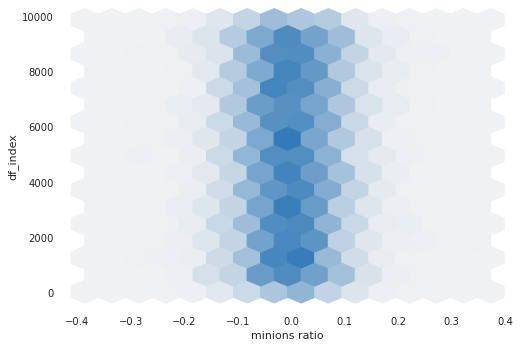

In [24]:
datapro.to_file('data_pro_improved.html')

# Visualization

In [25]:
numerical = data_pro.drop(["blueWins"], axis=1).select_dtypes("number").columns
categorical = data_pro.columns
data_pro[categorical].nunique()

red heralds                2
red dragons                2
red elite monsters         3
blue heralds               2
blue dragons               2
blue elite monsters        3
blue first blood           2
minions ratio           4945
jungle ratio            1508
level ratio              116
experience ratio        9802
gold ratio              9798
wards destroy ratio      126
wards place ratio       1349
kills ratio              165
blueWins                   2
dtype: int64

In [26]:
categorical

Index(['red heralds', 'red dragons', 'red elite monsters', 'blue heralds',
       'blue dragons', 'blue elite monsters', 'blue first blood',
       'minions ratio', 'jungle ratio', 'level ratio', 'experience ratio',
       'gold ratio', 'wards destroy ratio ', 'wards place ratio',
       'kills ratio', 'blueWins'],
      dtype='object')

In [27]:
df_1 = data_pro.loc[data_pro.blueWins == 1]
df_0 = data_pro.loc[data_pro.blueWins == 0]

In [31]:
from matplotlib.pyplot import figure

In [34]:
fig.set_size_inches(100, 100, forward=True)

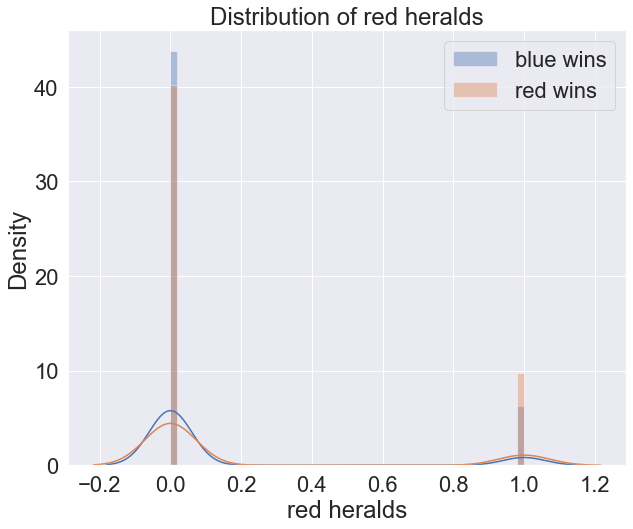

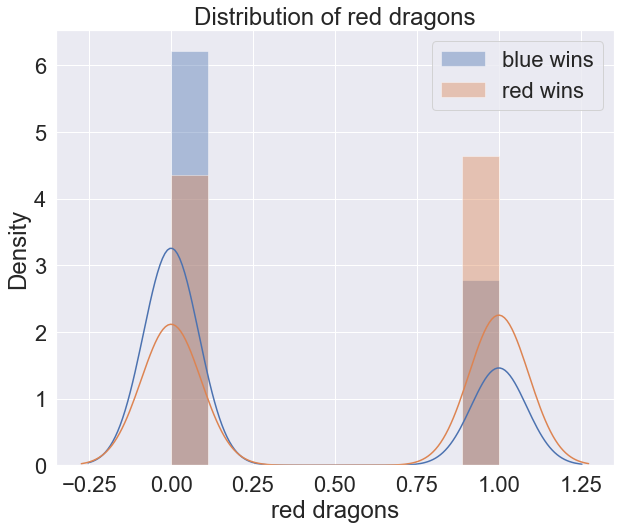

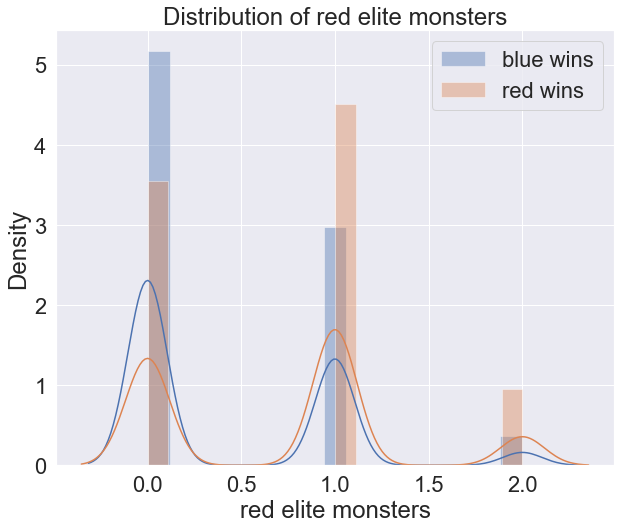

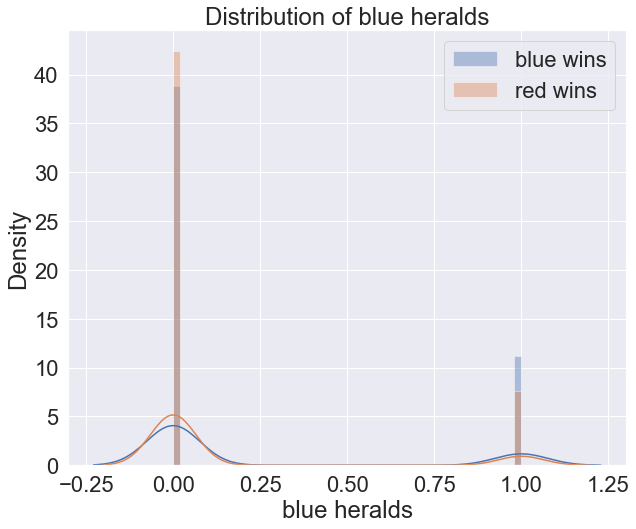

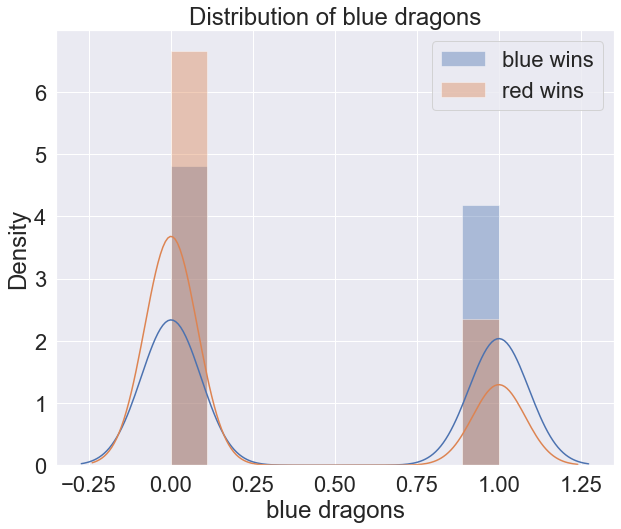

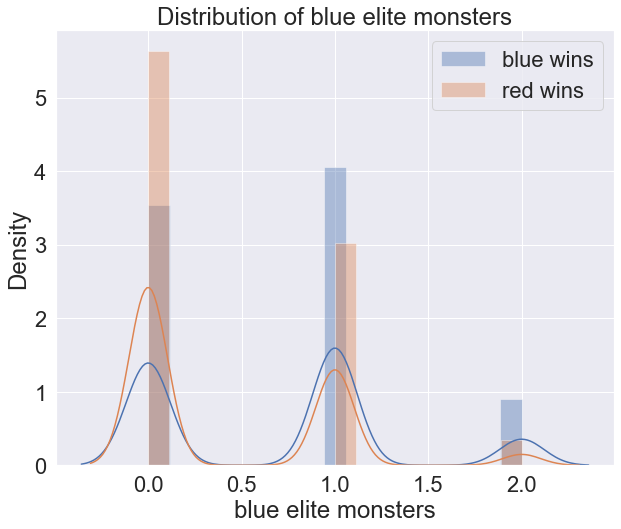

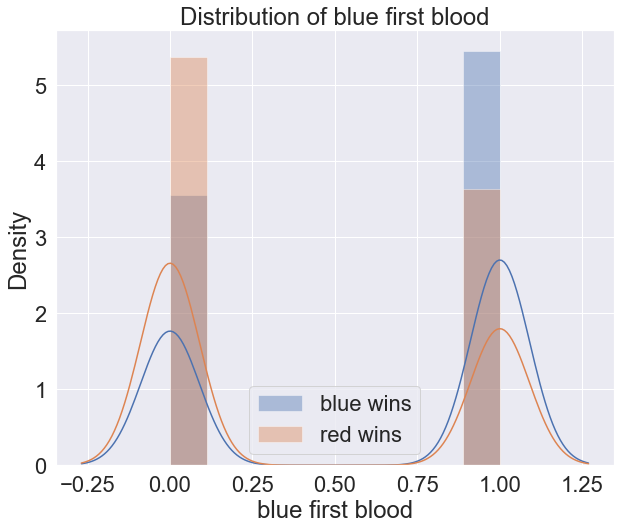

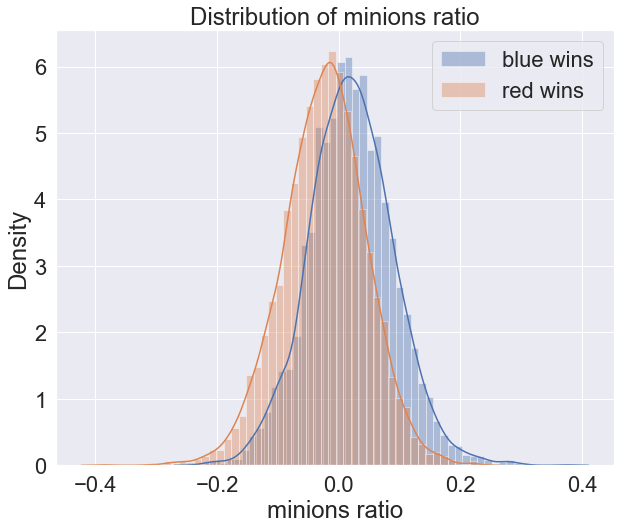

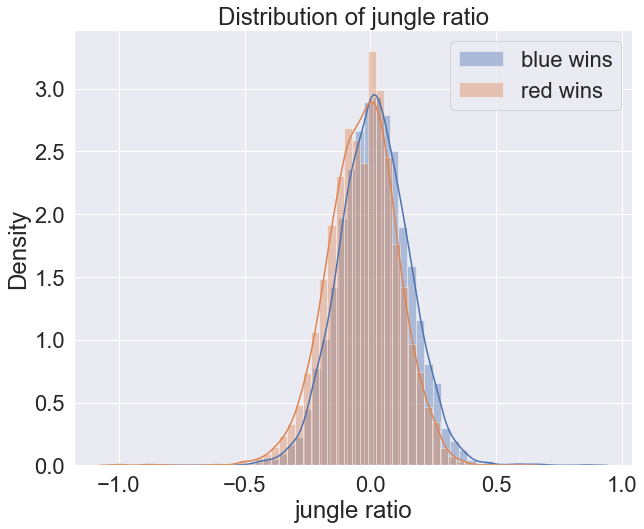

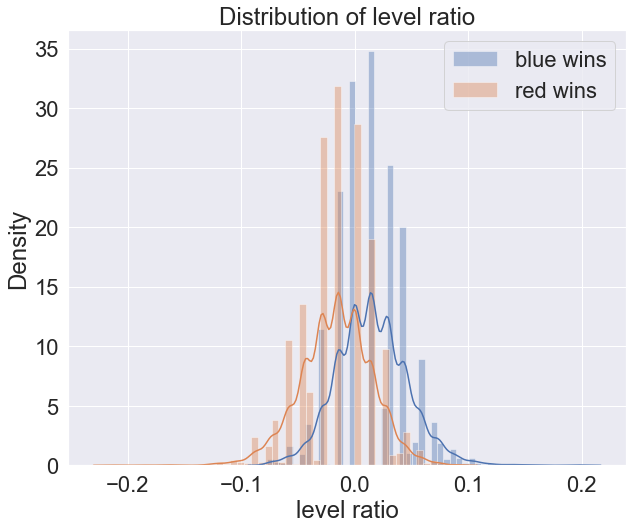

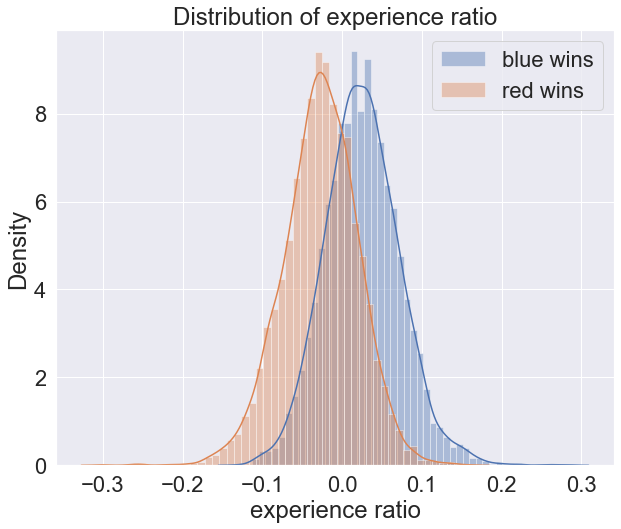

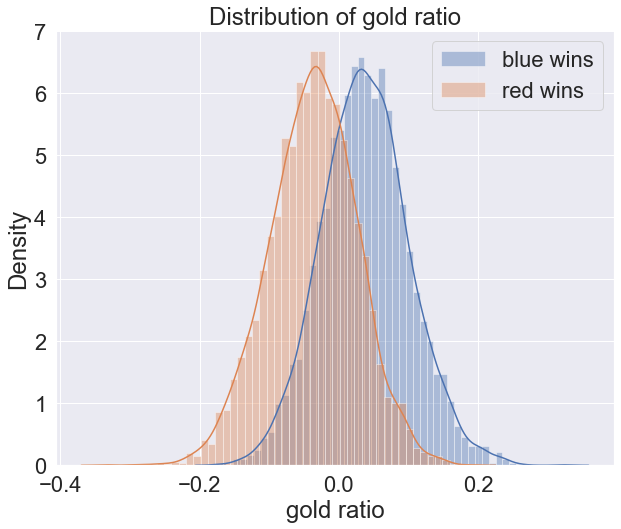

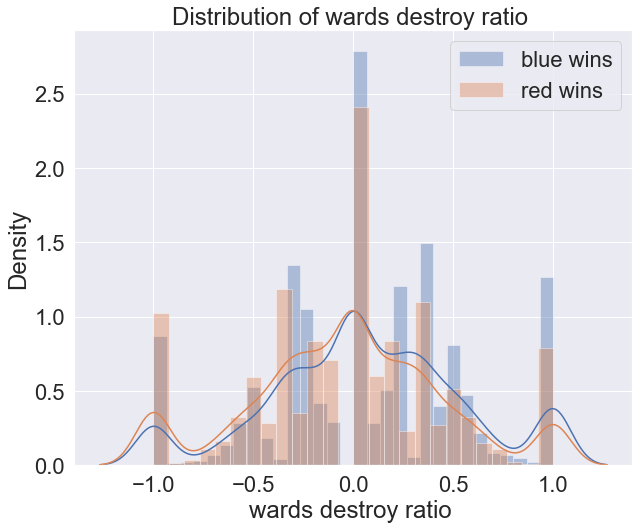

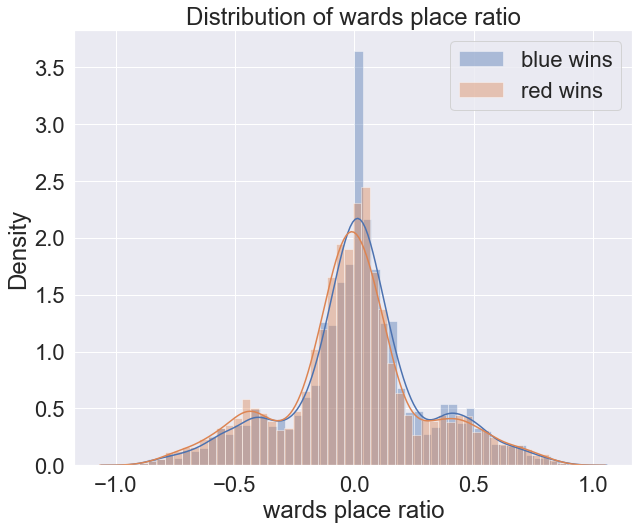

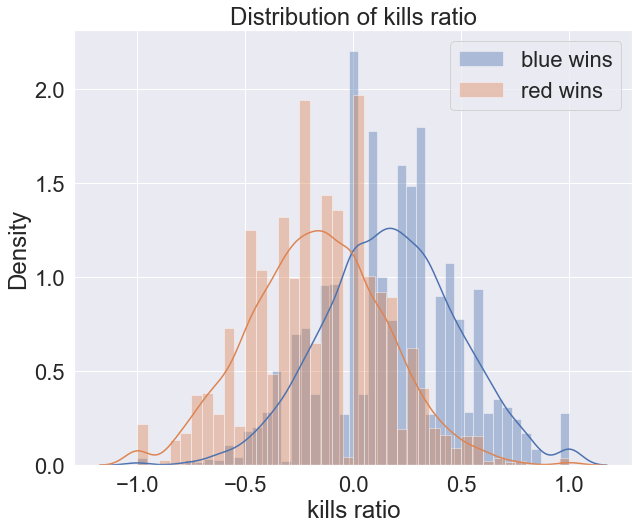

In [65]:
for var in numerical:
    df_1 = data_pro.loc[data_pro.blueWins == 1]
    df_0 = data_pro.loc[data_pro.blueWins == 0]
    
    fig = plt.figure(figsize=(10,8))
    sns.distplot(a=df_1[var], label="blue wins")
    sns.distplot(a=df_0[var], label="red wins")
    
    plt.title("Distribution of" + " " + var)
    plt.legend()
    plt.show()

In [78]:
df_1

,red heralds,red dragons,red elite monsters,blue heralds,blue dragons,blue elite monsters,blue first blood,minions ratio,jungle ratio,level ratio,experience ratio,gold ratio,wards destroy ratio,wards place ratio,kills ratio,blueWins
5,0,0,0,0,1,1,0,0.008969,-0.168317,0.000000,0.002788,0.022444,-1.000000,-0.333333,0.250000,1
6,0,0,0,0,1,1,1,0.156812,0.204545,0.030303,0.048284,0.076938,0.500000,-0.520000,0.076923,1
9,0,0,0,0,1,1,1,-0.057816,-0.048780,0.000000,-0.044736,-0.048891,-0.333333,-0.103448,-0.111111,1
12,0,0,0,0,1,1,1,-0.004184,0.029126,0.042254,0.045396,0.100875,0.000000,0.200000,0.750000,1
14,0,0,0,0,0,0,1,-0.038627,0.030303,-0.014493,-0.005197,-0.014727,0.500000,-0.743590,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,0,1,1,0,0,0,1,0.033557,-0.234043,0.000000,0.000028,0.022531,-1.000000,-0.666667,0.000000,1
9873,0,0,0,0,0,0,1,0.024752,0.095238,0.043478,0.064913,0.076477,-0.500000,0.058824,0.333333,1
9874,0,0,0,0,1,1,1,-0.040909,0.339806,0.028571,0.069618,0.076308,-0.200000,-0.460317,0.272727,1
9875,0,0,0,0,1,1,0,0.061503,-0.076923,0.014085,0.023603,0.024673,-1.000000,0.636364,0.200000,1


# machine learning

In [44]:
adaboost = AdaBoostClassifier(random_state=4)
gradientboost = GradientBoostingClassifier(random_state=4)
randomforest = RandomForestClassifier(random_state=77)
extratree = ExtraTreesClassifier(random_state=1)
svm = SVC(random_state=1)
gnb = GaussianNB()
knn=KNeighborsClassifier(n_neighbors=50)
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

models = [adaboost, gradientboost, randomforest, extratree,svm,gnb,knn,lr,dtc]

In [47]:
randomforest.fit(xtrain,ytrain)
ypred=randomforest.predict(xtest)
ypretrain=randomforest.predict(xtrain)
#accuracy_score(ytrain, ypretrain)
accuracy_score(ytest,ypred)

0.7239972807613868

In [49]:
#datapro
x = data_pro.drop("blueWins", axis=1)
y = data_pro['blueWins']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=49)

In [48]:
#dataprocess
x = processed_set.drop("blueWins", axis=1)
y = processed_set['blueWins']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=32)

NameError: name 'processed_set' is not defined

In [58]:
sns.set(font_scale=2)

model : AdaBoostClassifier(random_state=4) and the test accuracy score is : 0.725
model : AdaBoostClassifier(random_state=4) and the train accuracy score is : 0.7321


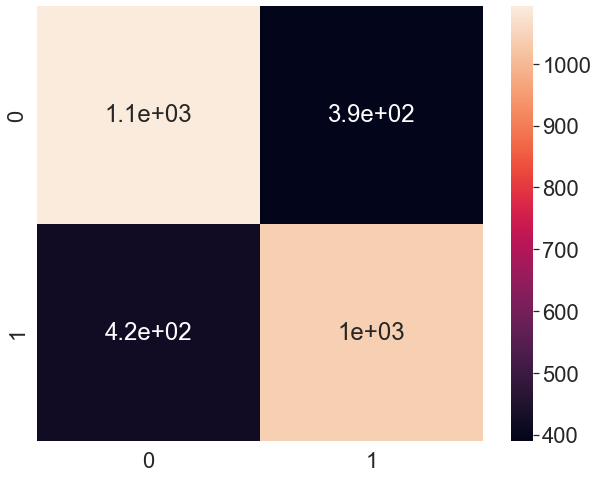

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1482
           1       0.73      0.71      0.72      1460

    accuracy                           0.73      2942
   macro avg       0.73      0.72      0.72      2942
weighted avg       0.73      0.73      0.72      2942

model : GradientBoostingClassifier(random_state=4) and the test accuracy score is : 0.7318
model : GradientBoostingClassifier(random_state=4) and the train accuracy score is : 0.7493


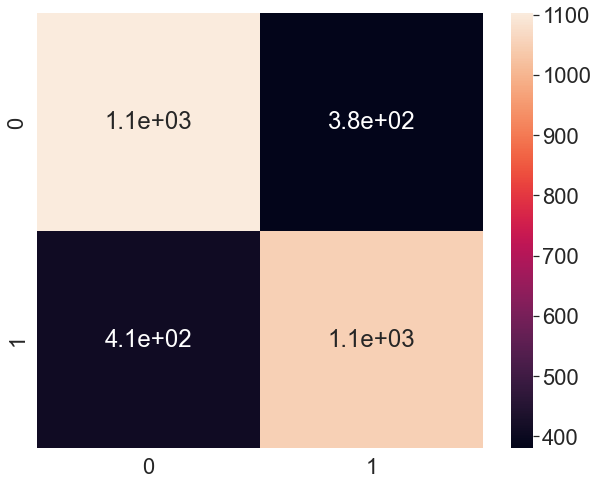

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1482
           1       0.73      0.72      0.73      1460

    accuracy                           0.73      2942
   macro avg       0.73      0.73      0.73      2942
weighted avg       0.73      0.73      0.73      2942

model : RandomForestClassifier(random_state=77) and the test accuracy score is : 0.724
model : RandomForestClassifier(random_state=77) and the train accuracy score is : 1.0


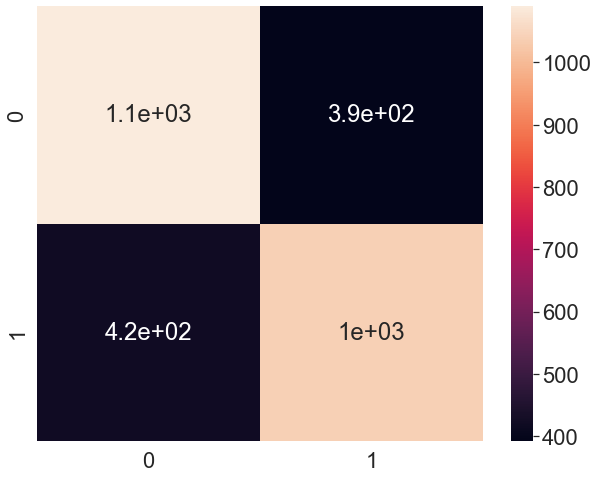

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1482
           1       0.73      0.71      0.72      1460

    accuracy                           0.72      2942
   macro avg       0.72      0.72      0.72      2942
weighted avg       0.72      0.72      0.72      2942

model : ExtraTreesClassifier(random_state=1) and the test accuracy score is : 0.722
model : ExtraTreesClassifier(random_state=1) and the train accuracy score is : 1.0


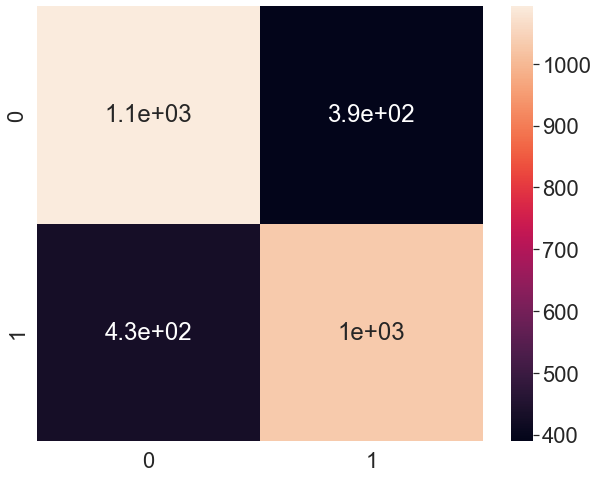

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1482
           1       0.73      0.71      0.72      1460

    accuracy                           0.72      2942
   macro avg       0.72      0.72      0.72      2942
weighted avg       0.72      0.72      0.72      2942

model : SVC(random_state=1) and the test accuracy score is : 0.7311
model : SVC(random_state=1) and the train accuracy score is : 0.7234


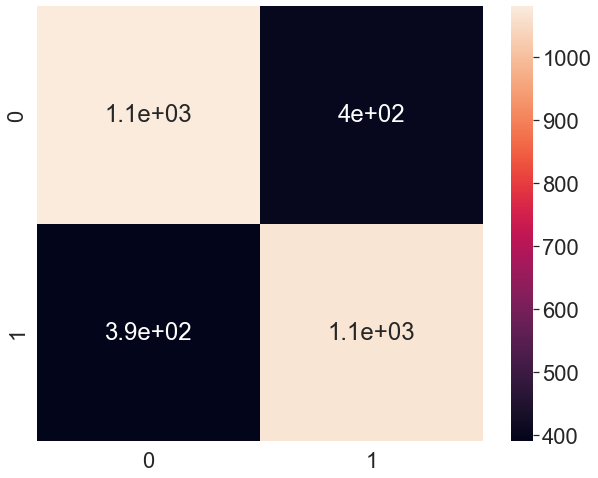

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1482
           1       0.73      0.73      0.73      1460

    accuracy                           0.73      2942
   macro avg       0.73      0.73      0.73      2942
weighted avg       0.73      0.73      0.73      2942

model : GaussianNB() and the test accuracy score is : 0.7339
model : GaussianNB() and the train accuracy score is : 0.7193


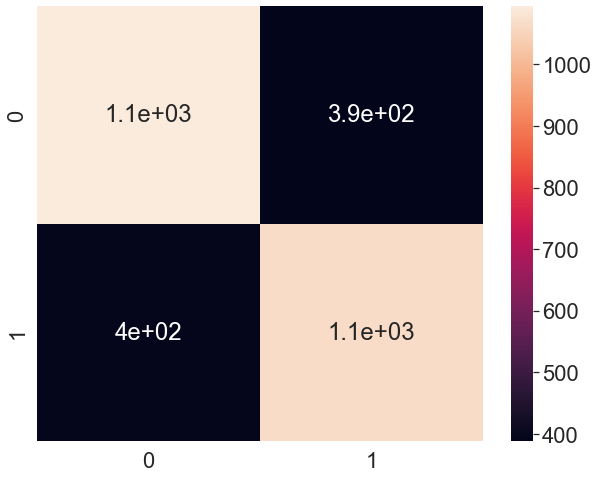

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1482
           1       0.73      0.73      0.73      1460

    accuracy                           0.73      2942
   macro avg       0.73      0.73      0.73      2942
weighted avg       0.73      0.73      0.73      2942

model : KNeighborsClassifier(n_neighbors=50) and the test accuracy score is : 0.7084
model : KNeighborsClassifier(n_neighbors=50) and the train accuracy score is : 0.7099


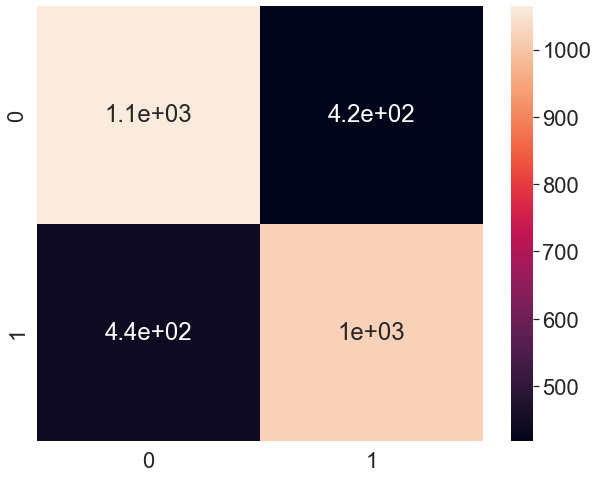

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1482
           1       0.71      0.70      0.70      1460

    accuracy                           0.71      2942
   macro avg       0.71      0.71      0.71      2942
weighted avg       0.71      0.71      0.71      2942

model : LogisticRegression() and the test accuracy score is : 0.7413
model : LogisticRegression() and the train accuracy score is : 0.7221


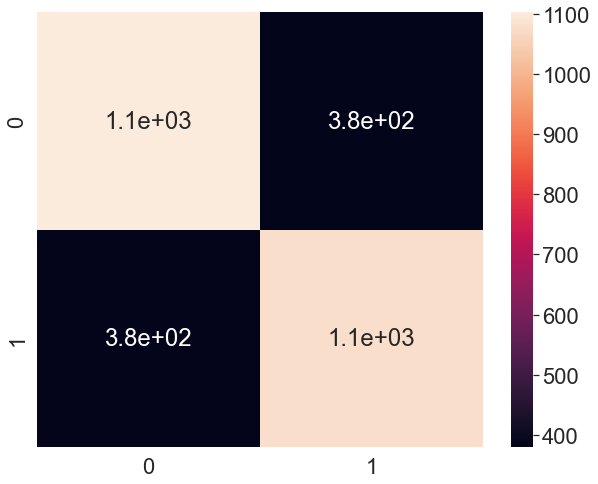

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1482
           1       0.74      0.74      0.74      1460

    accuracy                           0.74      2942
   macro avg       0.74      0.74      0.74      2942
weighted avg       0.74      0.74      0.74      2942

model : DecisionTreeClassifier() and the test accuracy score is : 0.6332
model : DecisionTreeClassifier() and the train accuracy score is : 1.0


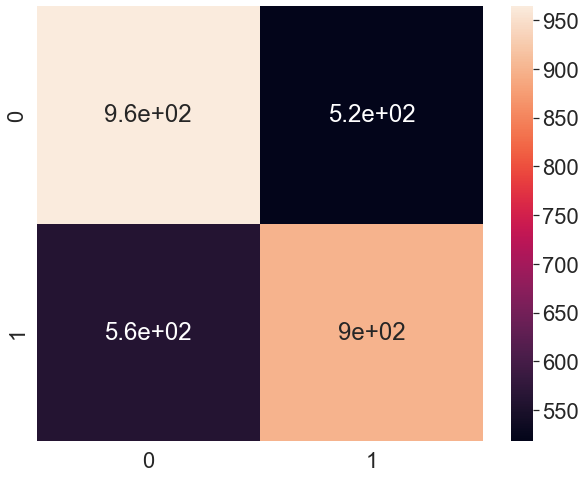

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1482
           1       0.63      0.62      0.62      1460

    accuracy                           0.63      2942
   macro avg       0.63      0.63      0.63      2942
weighted avg       0.63      0.63      0.63      2942



In [59]:
categorical = data_pro.select_dtypes("object").columns
onehotencoder = OneHotEncoder()
accuracy = []
train_accuracy = []
model_names = []
c = make_column_transformer((onehotencoder, categorical), remainder="passthrough")
for model in models:
    #use for loop to test each model
    fourmodels = make_pipeline(c, model)
    fourmodels.fit(xtrain, ytrain)
    y_pred = fourmodels.predict(xtest)
    #get the predict value based on the test value of x
    y_pretrain = fourmodels.predict(xtrain)
    #get the train value for y
    
    #y_pred_plot = fourmodels.predict_proba(xtest)[:, 1]
    #get the predict value for plotting the ROC curve
    accuracy.append(round(accuracy_score(ytest, y_pred), 4))
    train_accuracy.append(round(accuracy_score(ytrain, y_pretrain), 4))
    #append train accuracy and test accuracy
    print(f"model : {model} and the test accuracy score is : {round(accuracy_score(ytest, y_pred),4)}")
    print(f"model : {model} and the train accuracy score is : {round(accuracy_score(ytrain, y_pretrain),4)}")
    c_matrix = confusion_matrix(ytest, y_pred)
    # print ({model}+'the heat map of the confusion matrix is')
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(c_matrix, annot=True)
    plt.show()
    #plot the heat map
    report = classification_report(ytest, y_pred)
    print(report)
    #print the classification report
    


test accuracy is 0.7358939496940856
train accuracy is 0.7961235791314486


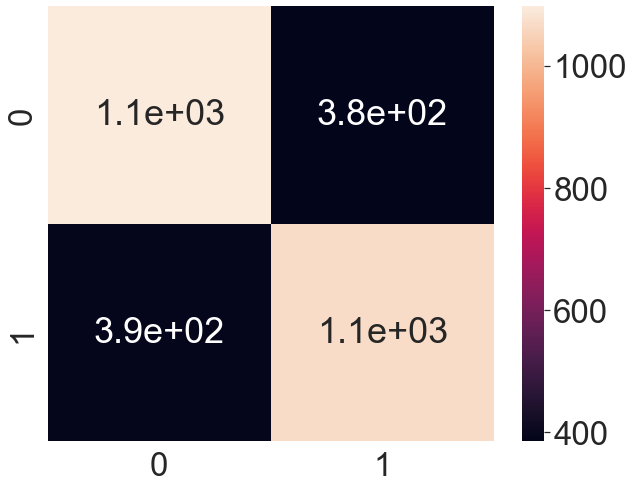

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1482
           1       0.74      0.73      0.73      1460

    accuracy                           0.74      2942
   macro avg       0.74      0.74      0.74      2942
weighted avg       0.74      0.74      0.74      2942



In [56]:
clf1 = KNeighborsClassifier(n_neighbors=50)
clf2 = RandomForestClassifier(random_state=77)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(random_state=4)
clf5 = AdaBoostClassifier(random_state=4)
eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft',
        n_jobs=1).fit(xtrain, ytrain)
y_pred = eclf.predict(xtest)
y_pretrain = eclf.predict(xtrain)
test_accuracy = accuracy_score(ytest, y_pred)
train_accuracy = accuracy_score(ytrain, y_pretrain)
print('test accuracy is '+str(test_accuracy))
print('train accuracy is '+str(train_accuracy))
c_matrix = confusion_matrix(ytest, y_pred)
fig = plt.figure(figsize=(10,8))
sns.heatmap(c_matrix, annot=True)
plt.show()
    #plot the heat map
report = classification_report(ytest, y_pred)
print(report)

,red heralds,red dragons,red elite monsters,blue heralds,blue dragons,blue elite monsters,blue first blood,minions ratio,jungle ratio,level ratio,experience ratio,gold ratio,wards destroy ratio,wards place ratio,kills ratio,blueWins
red heralds,1.000000,0.043116,0.619368,-0.210108,-0.017335,-0.144461,-0.059188,-0.092539,-0.099236,-0.143595,-0.166511,-0.165517,-0.011976,-0.024807,-0.128229,-0.096529
red dragons,0.043116,1.000000,0.811076,0.022514,-0.632799,-0.472116,-0.136020,-0.109405,-0.184716,-0.208830,-0.217948,-0.235865,-0.078642,-0.040538,-0.250949,-0.209257
red elite monsters,0.619368,0.811076,1.000000,-0.105323,-0.507424,-0.455584,-0.141543,-0.140154,-0.203257,-0.248178,-0.268760,-0.282258,-0.068811,-0.046380,-0.272279,-0.220957
blue heralds,-0.210108,0.022514,-0.105323,1.000000,0.021019,0.640314,0.076275,0.089995,0.099507,0.136689,0.161049,0.161966,-0.000861,0.008510,0.120257,0.092048
blue dragons,-0.017335,-0.632799,-0.507424,0.021019,1.000000,0.781402,0.135806,0.102785,0.178333,0.196970,0.210814,0.234843,0.068985,0.040890,0.251474,0.213351
blue elite monsters,-0.144461,-0.472116,-0.455584,0.640314,0.781402,1.000000,0.151946,0.135140,0.199119,0.236645,0.262487,0.281520,0.052463,0.036727,0.268264,0.221368
blue first blood,-0.059188,-0.136020,-0.141543,0.076275,0.135806,0.151946,1.000000,0.198728,0.033046,0.230076,0.240386,0.383988,0.059520,0.031121,0.385543,0.201371
minions ratio,-0.092539,-0.109405,-0.140154,0.089995,0.102785,0.135140,0.198728,1.000000,0.068112,0.571557,0.628115,0.636704,0.132290,-0.019124,0.399782,0.305579
jungle ratio,-0.099236,-0.184716,-0.203257,0.099507,0.178333,0.199119,0.033046,0.068112,1.000000,0.346988,0.373863,0.238497,0.021643,0.020051,0.103636,0.165349
level ratio,-0.143595,-0.208830,-0.248178,0.136689,0.196970,0.236645,0.230076,0.571557,0.346988,1.000000,0.920157,0.832855,0.155231,0.080652,0.718578,0.450396


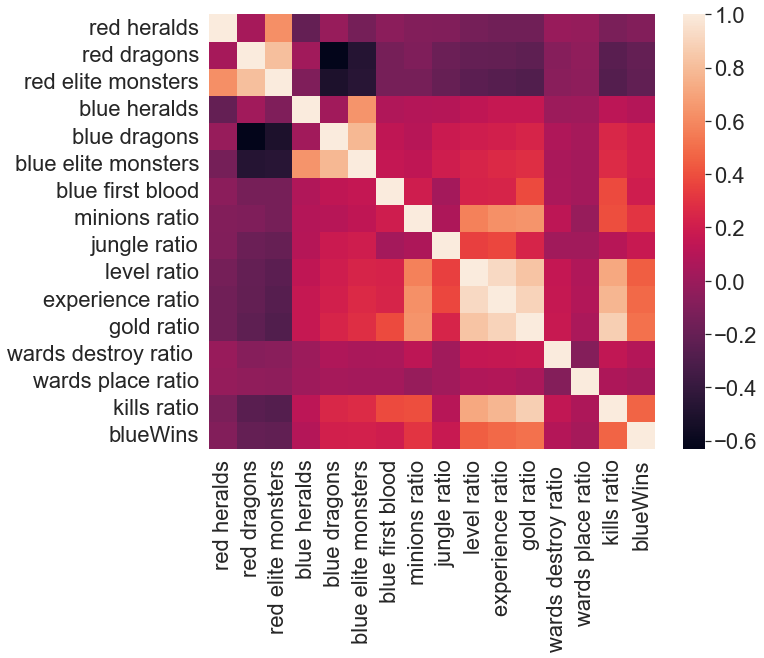

In [60]:
#降维

fig = plt.figure(figsize=(10,8))
sns.heatmap(data_pro.corr())
data_pro.corr()

In [39]:
processed_set = pd.DataFrame()

In [40]:
processed_set.insert(0, 'blueWins', data_pro['blueWins'], allow_duplicates=False)
processed_set.insert(0, 'gold ratio', data_pro['gold ratio'], allow_duplicates=False)
processed_set.insert(0, 'experience ratio', data_pro['experience ratio'], allow_duplicates=False)
processed_set.insert(0, 'kills ratio', data_pro['kills ratio'], allow_duplicates=False)
processed_set.insert(0, 'level ratio', data_pro['level ratio'], allow_duplicates=False)
processed_set.insert(0, 'minions ratio', data_pro['minions ratio'], allow_duplicates=False)


In [35]:
processed_set

,minions ratio,level ratio,kills ratio,experience ratio,gold ratio,blue Wins
0,-0.005102,-0.014925,0.200000,-0.000235,0.019037,0
1,-0.159420,-0.014925,0.000000,-0.034804,-0.089942,0
2,-0.043702,-0.030303,-0.222222,-0.030859,-0.035092,0
3,-0.077982,0.000000,-0.111111,-0.000195,-0.041758,0
4,-0.034483,0.000000,0.000000,0.006241,-0.029701,0
...,...,...,...,...,...,...
9874,-0.040909,0.028571,0.272727,0.069618,0.076308,1
9875,0.061503,0.014085,0.200000,0.023603,0.024673,1
9876,-0.108280,-0.027778,-0.076923,-0.049472,-0.070598,0
9877,-0.048832,-0.043478,-0.200000,-0.030526,-0.028195,0


In [50]:
x = processed_set.drop("blueWins", axis=1)
y = processed_set['blueWins']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=56)

In [62]:
gradientboost.fit(xtrain,ytrain)
ypred=gradientboost.predict(xtest)
ypretrain=gradientboost.predict(xtrain)
accuracy_score(ytest, ypred)
accuracy_score(ytrain, ypretrain)

0.7449723112795104